In [2]:
21+20

41

In [3]:
#
#
# digits.py
#
#

import numpy as np
from sklearn import cross_validation
import pandas as pd

# For Pandas's read_csv, use header=0 when you know row 0 is a header row
# df here is a "dataframe":
df = pd.read_csv('digits.csv', header=0)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1798 entries, 0 to 1797
Data columns (total 65 columns):
0     1798 non-null int64
1     1798 non-null int64
2     1798 non-null int64
3     1798 non-null int64
4     1798 non-null int64
5     1798 non-null int64
6     1798 non-null int64
7     1798 non-null int64
8     1798 non-null int64
9     1798 non-null int64
10    1798 non-null int64
11    1798 non-null int64
12    1798 non-null int64
13    1798 non-null int64
14    1798 non-null int64
15    1798 non-null int64
16    1798 non-null int64
17    1798 non-null int64
18    1798 non-null int64
19    1798 non-null int64
20    1798 non-null int64
21    1798 non-null int64
22    1798 non-null int64
23    1798 non-null int64
24    1798 non-null int64
25    1798 non-null int64
26    1798 non-null int64
27    1798 non-null int64
28    1798 non-null int64
29    1798 non-null int64
30    1798 non-null int64
31    1798 non-null int64
32    1798 non-null int64
33    1798 non-null int64
34    179

In [4]:
# Convert feature columns as needed...
# You may to define a function, to help out:
def transform(s):
    """ from number to string
    """
    return 'digit ' + str(s)
    
df['label'] = df['64'].map(transform)  # apply the function to the column
print("+++ End of pandas +++\n")

+++ End of pandas +++



In [5]:
df

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,label
0,0,0,1,9,15,11,0,0,0,0,...,0,0,0,0,0,0,0,0,-1,digit -1
1,0,0,3,13,11,7,0,0,0,0,...,0,0,0,0,0,0,0,0,-1,digit -1
2,0,0,10,14,11,3,0,0,0,4,...,0,0,0,0,0,0,0,0,-1,digit -1
3,0,0,0,0,12,5,0,0,0,0,...,0,0,0,0,0,0,0,0,-1,digit -1
4,0,0,3,12,16,16,6,0,0,0,...,0,0,0,0,0,0,0,0,-1,digit -1
5,0,0,13,14,8,1,0,0,0,1,...,0,0,0,0,0,0,0,0,-1,digit -1
6,0,6,16,16,15,7,0,0,0,2,...,0,0,0,0,0,0,0,0,-1,digit -1
7,0,0,0,5,14,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-1,digit -1
8,0,0,2,12,4,0,0,0,0,1,...,0,0,0,0,0,0,0,0,-1,digit -1
9,0,0,0,0,5,14,3,0,0,0,...,0,0,0,0,0,0,0,0,-1,digit -1


In [6]:
print("+++ Start of numpy/scikit-learn +++")

# We'll stick with numpy - here's the conversion to a numpy array
X_data = df.iloc[:,0:64].values        # iloc == "integer locations" of rows/cols
y_data = df[ 'label' ].values      # also addressable by column name(s)

#
# you can divide up your dataset as you see fit here...
#

+++ Start of numpy/scikit-learn +++


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
#
# feature display - use %matplotlib to make this work smoothly
#
from matplotlib import pyplot as plt

def show_digit( Pixels ):
    """ input Pixels should be an np.array of 64 integers (from 0 to 15) 
        there's no return value, but this should show an image of that 
        digit in an 8x8 pixel square
    """
    print(Pixels.shape)
    Patch = Pixels.reshape((8,8))
    plt.figure(1, figsize=(4,4))
    plt.imshow(Patch, cmap=plt.cm.gray_r, interpolation='nearest')  # cm.gray_r   # cm.hot
    plt.show()

(1, 64)


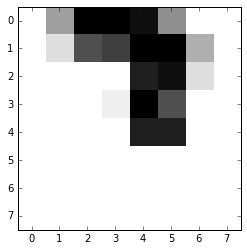

In [19]:
# try it!
row = 6
Pixels = X_data[row:row+1,:]
show_digit(Pixels)
#print("That image has the label:", y_data[row])

In [12]:
#
# This cell will probably become several...
#

print("The rest of the digits problem...")


#
# feature engineering...
#





#
# here, you'll implement the kNN model
#


#
# run cross-validation
#


#
# and then see how it does on the two sets of unknown-label data... (!)
#





"""
Comments and results:

Briefly mention how this went:
  + what value of k did you decide on for your kNN?
  + how smoothly were you able to adapt from the iris dataset to here?
  + how high were you able to get the average cross-validation (testing) score?



Then, include the predicted labels of the 12 digits with full data but no label:
Past those labels (just labels) here:
You'll have 12 lines:




And, include the predicted labels of the 10 digits that are "partially erased" and have no label:
Mention briefly how you handled this situation!?

Past those labels (just labels) here:
You'll have 10 lines:



"""
42

The rest of the digits problem...


42